In [1]:
from datetime import datetime

import matplotlib.pyplot as plt

from prediction.data import download_data, load_data, vessel_groups
from prediction.visualization import plot_north_america, plot_trajectories
from prediction.preprocessing import build_trajectories

In [2]:
download_data(datetime(2024, 1, 1))
groups = vessel_groups()
df = load_data(datetime(2024, 1, 1))
df["VesselType"] = df["VesselType"].apply(lambda x: x if x in groups.keys() else 21)

Data for 2024-01-01 already exists in /Users/marcus/Documents/Workspace/ship-trajectory-prediction/data/raw


100%|██████████| 1/1 [00:05<00:00,  5.63s/it]


In [3]:
trajectories = build_trajectories(df, min_points=10, vessel_groups=groups)
trajectories.head()

100%|██████████| 14868/14868 [02:28<00:00, 100.35it/s]


,MMSI,geometry,mmsi,velocities,orientations,start_time,end_time,point_count,vessel_type,timestamps
0,0,"LINESTRING (-76.18495 36.91335, -76.18494 36.9...",0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[171.9, 176.7, 181.1, 178.1, 179.7, 175.7, 176...",2024-01-01 00:01:59,2024-01-01 23:57:59,396.0,Other,"[2024-01-01 00:01:59, 2024-01-01 00:04:59, 202..."
2,3381234,"LINESTRING (-76.70942 34.71526, -76.70934 34.7...",3381234.0,"[0.6, 0.6, 0.6, 0.6, 0.4, 0.4, 0.4, 0.5, 0.7, ...","[98.5, 98.5, 0.0, 0.0, 38.1, 38.1, 38.1, 38.1,...",2024-01-01 00:01:03,2024-01-01 23:58:10,349.0,Other,"[2024-01-01 00:01:03, 2024-01-01 00:03:03, 202..."
3,3660489,"LINESTRING (-89.9242 27.37022, -89.9242 27.370...",3660489.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[311.0, 311.0, 311.0, 273.0, 273.0, 327.0, 327...",2024-01-01 00:01:47,2024-01-01 21:01:46,30.0,Other,"[2024-01-01 00:01:47, 2024-01-01 00:04:47, 202..."
7,36926403,"LINESTRING (-81.41262 30.3923, -81.4126 30.392...",36926403.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[104.2, 94.3, 84.4, 89.5, 99.3, 109.7, 117.7, ...",2024-01-01 00:00:18,2024-01-01 23:57:17,438.0,Other,"[2024-01-01 00:00:18, 2024-01-01 00:03:19, 202..."
8,36968098,"LINESTRING (-76.32952 36.9512, -76.32949 36.95...",36968098.0,"[0.1, 0.1, 0.0, 0.1, 0.1, 0.0, 0.1, 0.0, 0.0, ...","[128.8, 123.6, 126.3, 110.1, 125.6, 118.7, 125...",2024-01-01 00:00:07,2024-01-01 23:58:58,1245.0,Unknown,"[2024-01-01 00:00:07, 2024-01-01 00:01:17, 202..."


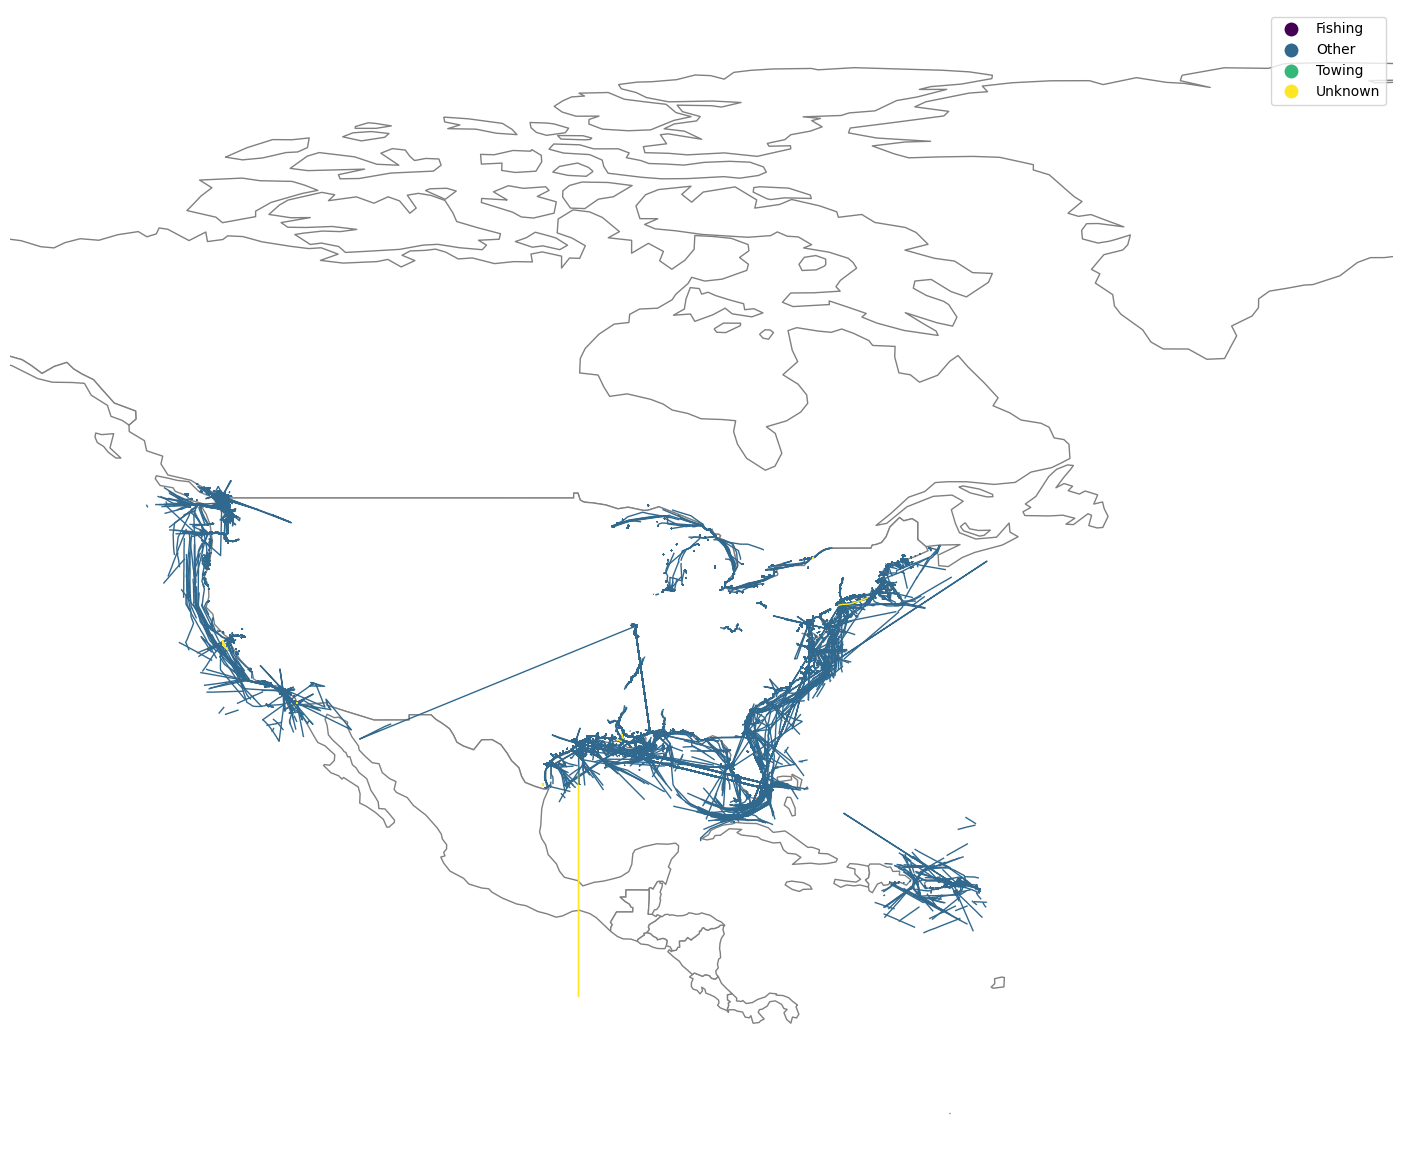

In [4]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_axis_off()
plot_north_america(ax)
plot_trajectories(trajectories, ax)

# cut axes to north america
ax.set_xlim(-140, -30)

plt.show()

In [5]:
trajectories_new = trajectories.copy()

In [6]:
from prediction.preprocessing import remove_outliers_parallel


In [7]:

trajectories_new = remove_outliers_parallel(trajectories_new, threshold_partition=5.0, threshold_association=15.0, threshold_completeness=100.0)

Processing with 11 processes...


100%|██████████| 1263/1263 [00:04<00:00, 304.38it/s]


In [8]:
trajectories_new.head()

,MMSI,geometry,mmsi,velocities,orientations,start_time,end_time,point_count,vessel_type,timestamps
16,205402470,"LINESTRING (-80.08774 26.07088, -80.09011 26.0...",205402470.0,"[14.9, 14.6, 15.4, 15.8, 15.2, 15.3, 16.2, 15....","[188.1, 188.8, 179.4, 188.0, 189.0, 188.8, 183...",2024-01-01 17:24:07,2024-01-01 21:37:51,187.0,Other,"[2024-01-01 17:28:54, 2024-01-01 17:34:11, 202..."
17,205691000,"LINESTRING (-75.05644 38.82646, -75.05768 38.8...",205691000.0,"[10.2, 10.2, 10.3, 10.2, 10.3, 11.3, 12.0, 12....","[343.2, 342.7, 342.7, 342.6, 343.1, 342.3, 342...",2024-01-01 00:00:06,2024-01-01 23:58:41,649.0,Other,"[2024-01-01 00:01:16, 2024-01-01 00:02:25, 202..."
18,205717000,"LINESTRING (-125.5925 46.89496, -125.58606 46....",205717000.0,"[13.6, 13.6, 13.8, 13.7, 13.7, 13.8, 13.9, 13....","[92.4, 92.9, 92.5, 90.4, 90.7, 90.4, 88.4, 90....",2024-01-01 02:42:35,2024-01-01 23:59:42,526.0,Other,"[2024-01-01 03:09:33, 2024-01-01 03:10:44, 202..."
19,207832820,"LINESTRING (-80.14084 25.76976, -80.14341 25.7...",207832820.0,"[6.0, 10.4, 10.9, 11.1, 11.8, 11.8, 11.7, 11.5...","[182.2, 182.2, 182.2, 182.2, 182.2, 182.2, 182...",2024-01-01 00:01:26,2024-01-01 23:59:59,489.0,Other,"[2024-01-01 01:27:26, 2024-01-01 01:28:55, 202..."
20,209156000,"LINESTRING (-90.11455 29.90693, -90.11046 29.9...",209156000.0,"[11.2, 11.1, 10.6, 10.6, 10.6, 10.6, 10.6, 10....","[107.4, 100.6, 89.1, 74.2, 69.9, 70.1, 69.0, 6...",2024-01-01 00:00:04,2024-01-01 13:42:15,694.0,Other,"[2024-01-01 00:01:13, 2024-01-01 00:02:23, 202..."


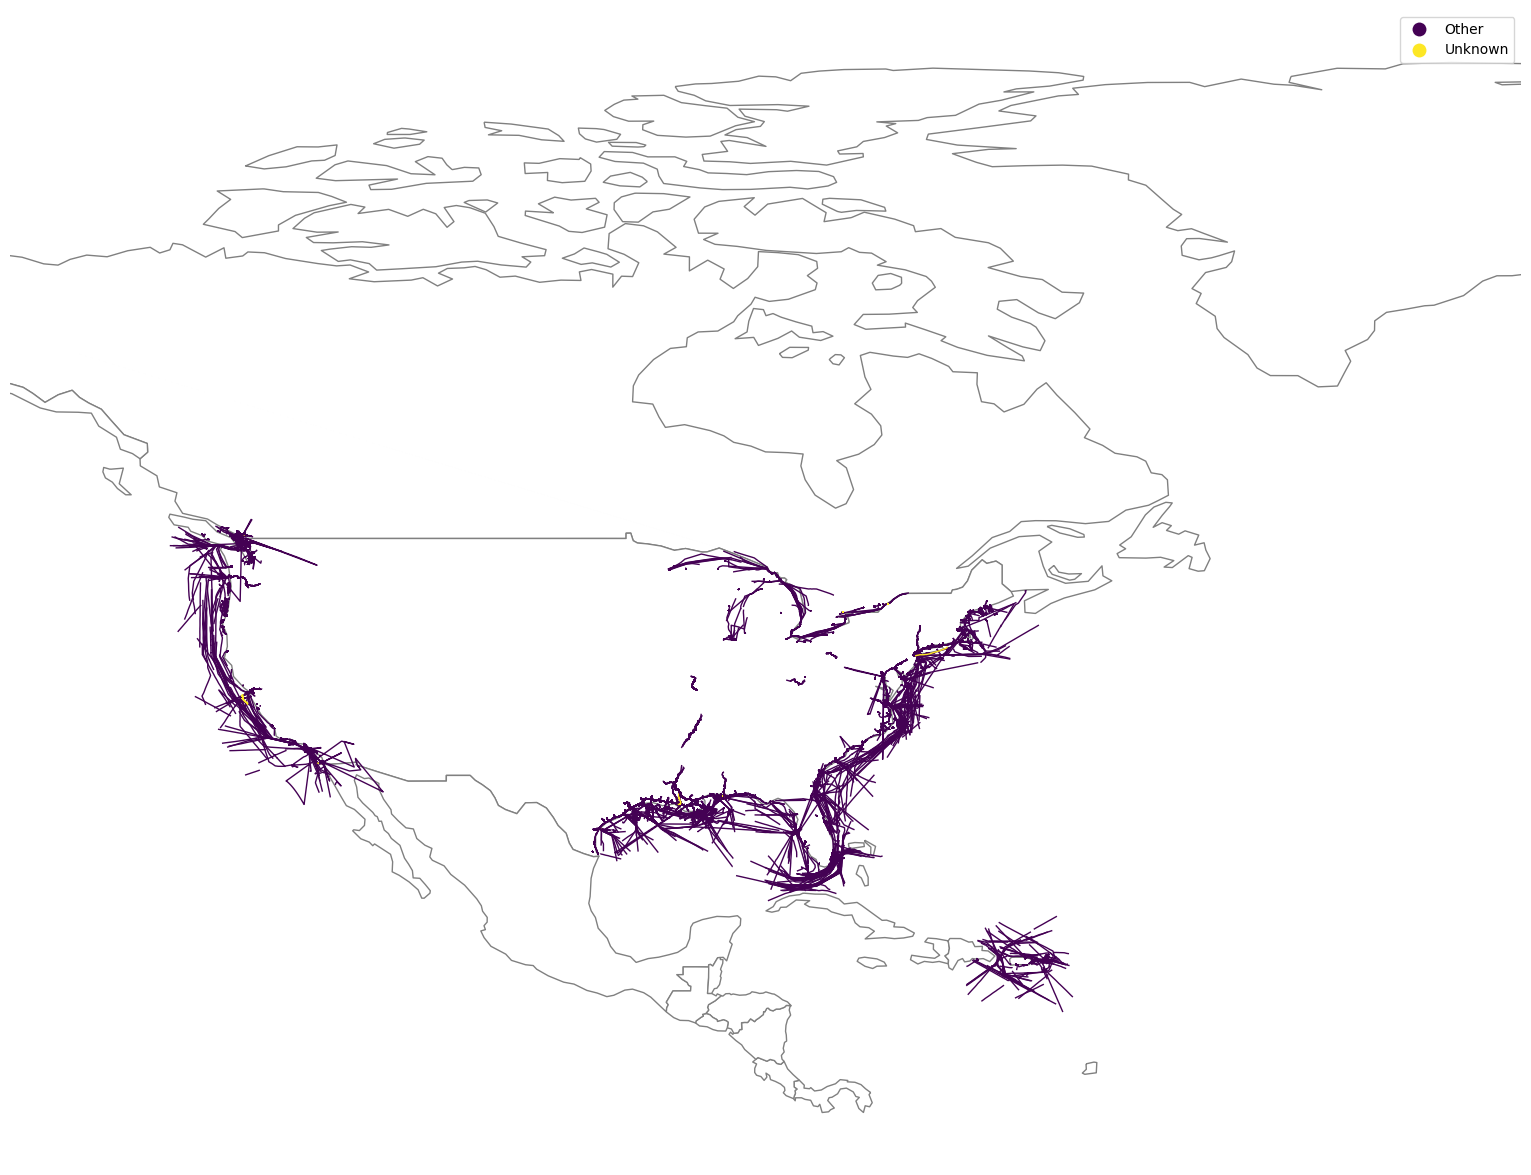

In [9]:
fig, ax = plt.subplots(figsize=(20,15))
ax.set_axis_off()
plot_north_america(ax)
plot_trajectories(trajectories_new, ax)

# cut axes to north america
ax.set_xlim(-140, -30)

plt.show()

In [ ]:
# 1. discard trajectories with less than 100 points